In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google_drive_downloader import GoogleDriveDownloader

In [ ]:
file_id = "1A88x55wkVMTbGnDD__CzRXbvzMcfpRU_"

GoogleDriveDownloader.download_file_from_google_drive(
    file_id = file_id,
    dest_path = "./consumo.zip",
    unzip = True
)

Unzipping...Done.


# Usando o parse_date

In [ ]:
df = pd.read_csv("/content/AEP_hourly.csv", parse_dates=["Datetime"], index_col=["Datetime"])
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


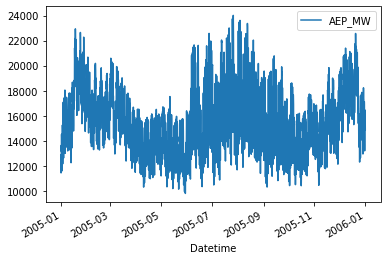

In [ ]:
df.loc["2005"].plot()

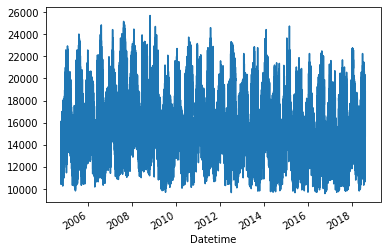

In [ ]:
df["AEP_MW"].plot()

In [ ]:
df.loc["2006"].mean()

AEP_MW    15737.224252
dtype: float64

#Média móvel simples
Janela de tamaho n

In [ ]:
n=24    #tamanho da janela
soma=0
for i in range (0,df.shape[0]-2):
    for j in range (0,n):
        soma += np.round(df.iloc[j,0],1)
    media = soma/n
    df.loc[df.index[i-n+1],'SMA_3'] = media
df.head()

,AEP_MW,SMA_3
Datetime,,
2004-12-31 01:00:00,13478.0,337170.00
2004-12-31 02:00:00,12865.0,351218.75
2004-12-31 03:00:00,12577.0,365267.50
2004-12-31 04:00:00,12517.0,379316.25
2004-12-31 05:00:00,12670.0,393365.00


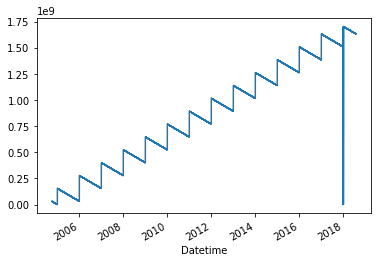

In [ ]:
df["SMA_3"].plot()